# Personal Color Theory Analysis

This project explores a number of questions related to personal color theory. 
Along the way we demonstrate the following useful basics to know: 
- How to import images using OpenCV (import cv2) from pathnames generated by glob (https://docs.python.org/3/library/glob.html). 
- How to convert those images which are in BGR back to RGB (https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading).
- How to save labels for the images from the filename (https://stackoverflow.com/questions/52658094/extract-details-in-multiple-image-filenames-in-python-and-add-them-as-labels-for).
- Displaying the image with label 
- 3d scatter plot the data colored by category.(https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html)
- create an interactive 3d plot with %matplotlib. Alternatively, interactively in notebook "%matplotlib notebook". (https://stackoverflow.com/questions/33436221/displaying-rotatable-3d-plots-in-ipython-or-ipython-notebook/33440743#33440743).

In [1]:
#Importing images from src1
import glob
import cv2
import matplotlib.pyplot as plt
data = []

#iterate over all directories/subdirs of appropriate folder, pathnames generated by glob.
for image in glob.glob('colortheory/src1/*/*.png', recursive = True):
    name = image.replace('2','').split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) #append labels+image with GBR ->RGB
    data.append([name[-1], name[-2], img]) 
                   
    

Text(0.5,1,'deep autumn')

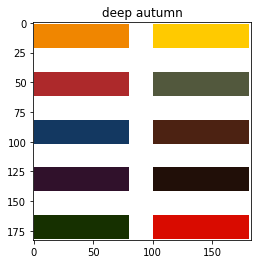

In [2]:
#Example display image+title for the first image

import matplotlib.pyplot as plt
plt.imshow(data[-12][-1])
plt.title(data[-12][0]+' '+data[-12][1])


# RGB training data:

In [3]:
#Collect train data.
#x := RGB
#y := season and type
colors_train = []
colors_dict = {} #dict makes plotting easier.

In [4]:
#working on src1 first
inds = []
for i in range(5):
    x = 15+40*i
    inds.append([[x, 50], [x, -50]])
        
#iterate over the 12 images with 10 colors in each
for ind in range(12):
    ind = -(ind+1)
    stype = data[ind][0]
    season = data[ind][1]
    for row in inds:
        for coord in row:
            pxl = data[ind][-1][coord[0]][coord[1]]
            
            #update colors_train
            colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])
            
            #update colors_dict
            if season in colors_dict:
                if stype in colors_dict[season]:
                    for i,row in enumerate(colors_dict[season][stype]):
                        row.append(pxl[i])
                else: 
                    colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
            else:
                colors_dict[season] = {}
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [5]:
#working on src2
inds = []
for i in range(3):
    x = 25+100*i
    inds.append([[x, 50],[x,150],[x,-150], [x, -50]])

for image in glob.glob('colortheory/src2/*/*.png', recursive = True):
    name = image.split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)[468:720, 27:-30]
    stype = name[-1]
    season = name[-2]
                                                #append labels+image with GBR ->RGB
    for row in inds:
        for coord in row:
            pxl = img[coord[0]][coord[1]]
            #update colors_train
            colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])
            
            #update colors_dict
            if season in colors_dict:
                if stype in colors_dict[season]:
                    for i,row in enumerate(colors_dict[season][stype]):
                        row.append(pxl[i])
                else: 
                    colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
            else:
                colors_dict[season] = {}
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [6]:
#working on src3
inds = []
for i in range(5):
    x = 200+100*i
    inds.append([[x, 100],[x, 200],[x,300], [x, 400]])

for image in glob.glob('colortheory/src3/*/*.png', recursive = True):
    name = image.split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    stype = name[-1]
    season = name[-2]
                                                #append labels+image with GBR ->RGB
    for row in inds:
        for coord in row:
            pxl = img[coord[0]][coord[1]]
            #update colors_train
            colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])
            
            #update colors_dict
            if season in colors_dict:
                if stype in colors_dict[season]:
                    for i,row in enumerate(colors_dict[season][stype]):
                        row.append(pxl[i])
                else: 
                    colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
            else:
                colors_dict[season] = {}
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [7]:
#working on src4
inds = []
for i in range(8):
    for j in range(5):        
        x = 80+60*i
        y = 20+60*j
        inds.append([x,y])
for i in range(6):
    for j in range(3):        
        x = 200+60*i
        y = 320+60*j
        inds.append([x,y])
for i in range(5):
    for j in range(2):        
        x = 260+60*i
        y = 500+60*j
        inds.append([x,y])

for image in glob.glob('colortheory/src4/*/*.png', recursive = True):
    name = image.split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    stype = name[-1]
    season = name[-2]
                                                #append labels+image with GBR ->RGB
    for ind in inds:        
        pxl = img[ind[0]][ind[1]]
        #update colors_train
        colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])

        #update colors_dict
        if season in colors_dict:
            if stype in colors_dict[season]:
                for i,row in enumerate(colors_dict[season][stype]):
                    row.append(pxl[i])
            else: 
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
        else:
            colors_dict[season] = {}
            colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [8]:
#working on src5
inds = []
for i in range(10):
    for j in range(7):
        x = 200+170*j
        y = 150+170*i
        inds.append([x, y])

for image in glob.glob('colortheory/src5/*/*.jpg', recursive = True):
    name = image.split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    stype = name[-1]
    season = name[-2]
                                                #append labels+image with GBR ->RGB
    for ind in inds:
        pxl = img[ind[0]][ind[1]]
        #update colors_train
        colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])

        #update colors_dict
        if season in colors_dict:
            if stype in colors_dict[season]:
                for i,row in enumerate(colors_dict[season][stype]):
                    row.append(pxl[i])
            else: 
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
        else:
            colors_dict[season] = {}
            colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [9]:
#working on src6
inds = []
for i in range(10):
    if i!=10:
        for j in range(7):
            x = 200+170*j
            y = 150+170*i
            inds.append([x, y])
    else:
        for j in range(2):
            x = 200+170*j
            y = 150+170*i
            inds.append([x, y])

altinds = []
for i in range(10):
    if i!=10:
        for j in range(7):
            x = 55+170*j
            y = 40+55*i
            inds.append([x, y])  
    else:
        for j in range(2):
            x = 55+170*j
            y = 40+55*i
            inds.append([x, y]) 
    
for image in glob.glob('colortheory/src6/*/*.jpg', recursive = True):
    name = image.replace('2','').split('.')[0].split('/') #extract label data from filename
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    stype = name[-1]
    season = name[-2]
                                                #append labels+image with GBR ->RGB

    if name[-1]=='clear' and name[-2]=='spring':
        tempinds = altinds
    else: tempinds = inds
        
    for ind in tempinds:
        pxl = img[ind[0]][ind[1]]
        #update colors_train
        colors_train.append([pxl[0], pxl[1], pxl[2], stype, season])

        #update colors_dict
        if season in colors_dict:
            if stype in colors_dict[season]:
                for i,row in enumerate(colors_dict[season][stype]):
                    row.append(pxl[i])
            else: 
                colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]
        else:
            colors_dict[season] = {}
            colors_dict[season][stype] = [[pxl[0]], [pxl[1]], [pxl[2]]]

In [6]:
#This doesn't seem to work to generate distinct colors to 3d plot with, idea found at: 
#https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
# perhaps meant only for 2d

#import matplotlib.cm as cm
#c = cm.rainbow(range(4))

In [14]:
len(colors_train)

3700

In [33]:
import csv
#4 season analysis data
rgb4dict = {'R':[], 'G':[], 'B':[], 'type':[] }

for season in colors_dict:
    length = 0 
    for stype in colors_dict[season]:
        length += len(colors_dict[season][stype][0])
        rgb4dict['R'] = rgb4dict['R']+colors_dict[season][stype][0]
        rgb4dict['G'] = rgb4dict['G']+colors_dict[season][stype][1]
        rgb4dict['B'] = rgb4dict['B']+colors_dict[season][stype][2]
    rgb4dict['type'] = rgb4dict['type'] + [season]*length

with open('rgb4.csv', 'w') as outfile: 
    writer = csv.writer(outfile)
    writer.writerow(rgb4dict.keys())
    writer.writerows(zip(*rgb4dict.values()))
    
#12 seasonal analysis data
rgb12dict = {'R':[], 'G':[], 'B':[], 'type':[] }
for season in colors_dict:
    for stype in colors_dict[season]:
        length = len(colors_dict[season][stype][0])
        rgb12dict['R'] = rgb12dict['R']+colors_dict[season][stype][0]
        rgb12dict['G'] = rgb12dict['G']+colors_dict[season][stype][1]
        rgb12dict['B'] = rgb12dict['B']+colors_dict[season][stype][2]
        rgb12dict['type'] = rgb12dict['type'] + [season+stype]*length

        
with open('rgb12.csv', 'w') as outfile:  
    writer = csv.writer(outfile)
    writer.writerow(rgb12dict.keys())
    writer.writerows(zip(*rgb12dict.values()))

In [185]:
#3dscatter plot the RGB for each season, the points color-coded by season 

c = ['r','g','b','y'] #color for each season

#for interactive plotting:
%matplotlib

#3d plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#iterate over data
for i,season in enumerate(colors_dict):
    x = []
    y = []
    z = []
    for stype in colors_dict[season]:
        x = x+colors_dict[season][stype][0] #= colors_train[0][30*i:30*(i+1)]
        y = y+colors_dict[season][stype][1] #colors_train[1][30*i:30*(i+1)]
        z = z+colors_dict[season][stype][2] #colors_train[2][30*i:30*(i+1)]
    ax.scatter(x,y,z, color=c[i])


Using matplotlib backend: MacOSX


### Note: 
We notice when we scatter the RGB values of the different colors, it seems that the 4 categories -- spring, summer, autumn, winter -- don't demonstrate much/any?? separation. One would expect that linear classification methods like logistic regression should likely not work well on the data as is.

In [221]:
#Given the season, 3dscatter plot the RGB for each type, the points color-coded by type.

c = ['r','g','b']#color for each type

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
season = 'winter'
#iterate over data for given season
for i,stype in enumerate(colors_dict[season]):
    x = colors_dict[season][stype][0]
    y = colors_dict[season][stype][1] 
    z = colors_dict[season][stype][2]
    ax.scatter(x,y,z, color=c[i])

# CMYK training data:

In [ ]:
#4 season analysis data
cmyk4dict = {'C':[], 'M':[]